In [53]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [54]:
# Importing the dataset
dataset = pd.read_csv('Customers.csv')
dataset.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [55]:
features=dataset[["Annual Income (k$)","Spending Score (1-100)"]]

In [56]:
from sklearn.preprocessing import MinMaxScaler
#x = features.values #returns a numpy array
min_max_scaler = MinMaxScaler()
df = min_max_scaler.fit_transform(features)
df=pd.DataFrame(df,columns=features.columns)
df

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959
...,...,...
195,0.860656,0.795918
196,0.909836,0.275510
197,0.909836,0.744898
198,1.000000,0.173469


#### Clustering using Scipy
In this part we use Scipy package to cluster the dataset: First, we calculate the distance matrix.

In [57]:
from scipy.spatial import distance_matrix 
D = distance_matrix(df,df) 
print(D)

[[0.         0.42857143 0.33683444 ... 0.97742145 1.0227015  1.09616727]
 [0.42857143 0.         0.76535002 ... 0.91263558 1.18880836 1.00020822]
 [0.33683444 0.76535002 0.         ... 1.13772561 0.99933353 1.26531446]
 ...
 [0.97742145 0.91263558 1.13772561 ... 0.         0.57849818 0.12869934]
 [1.0227015  1.18880836 0.99933353 ... 0.57849818 0.         0.66326531]
 [1.09616727 1.00020822 1.26531446 ... 0.12869934 0.66326531 0.        ]]


In agglomerative clustering, at each iteration, the algorithm must update the distance matrix to reflect the distance of the newly formed cluster with the remaining clusters in the forest. The following methods are supported in Scipy for calculating the distance between the newly formed cluster and each:

- single
- complete
- average
- ward
- centroid

We use ward for our case, but feel free to change it to see how the results change.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


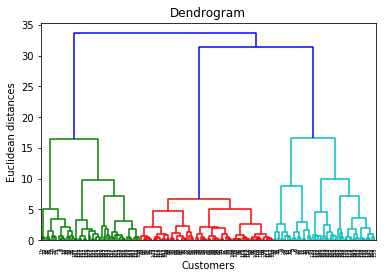

In [59]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(D, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Now, we can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line). Let’s set this threshold as 15 and draw a horizontal line and cut the dendogram:

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


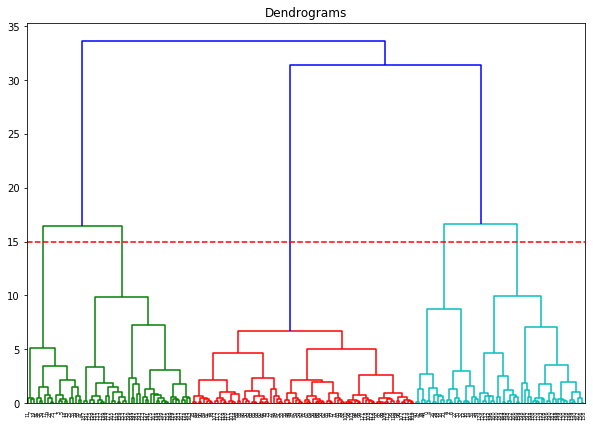

In [60]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(D, method='ward'))
plt.axhline(y=15, color='r', linestyle='--')

We have five clusters as this line cuts the dendrogram at two points. Let’s now apply hierarchical clustering for five clusters:



In [61]:
from sklearn.cluster import AgglomerativeClustering
clusters = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward').fit_predict(D) 
clusters

/opt/anaconda3/lib/python3.7/site-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 2, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [45]:
df["clusters"]=clusters

In [46]:
df1=df[df["clusters"]==0]
df2=df[df["clusters"]==1]
df3=df[df["clusters"]==2]
df4=df[df["clusters"]==3]
df5=df[df["clusters"]==4]

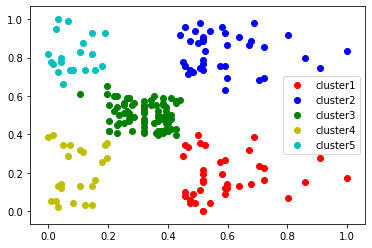

In [48]:
plt.scatter(df1["Annual Income (k$)"],df1["Spending Score (1-100)"],color='r',label="cluster1")
plt.scatter(df2["Annual Income (k$)"],df2["Spending Score (1-100)"],color='b',label="cluster2")
plt.scatter(df3["Annual Income (k$)"],df3["Spending Score (1-100)"],color='g',label="cluster3")
plt.scatter(df4["Annual Income (k$)"],df4["Spending Score (1-100)"],color='y',label="cluster4")
plt.scatter(df5["Annual Income (k$)"],df5["Spending Score (1-100)"],color='c',label="cluster5")
plt.legend()